#### Importing essential libraries and frameworks

In [1]:
import warnings
warnings.filterwarnings("ignore")

# ! pip install tensorflow
import tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("customer_purchase_data.csv")

In [4]:
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [5]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

#### No null values are present in the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [7]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [8]:
print("duplicates: ",df.duplicated().sum())

duplicates:  112


#### Dropping duplicates

In [9]:
df= df.drop_duplicates()

#### Analysis

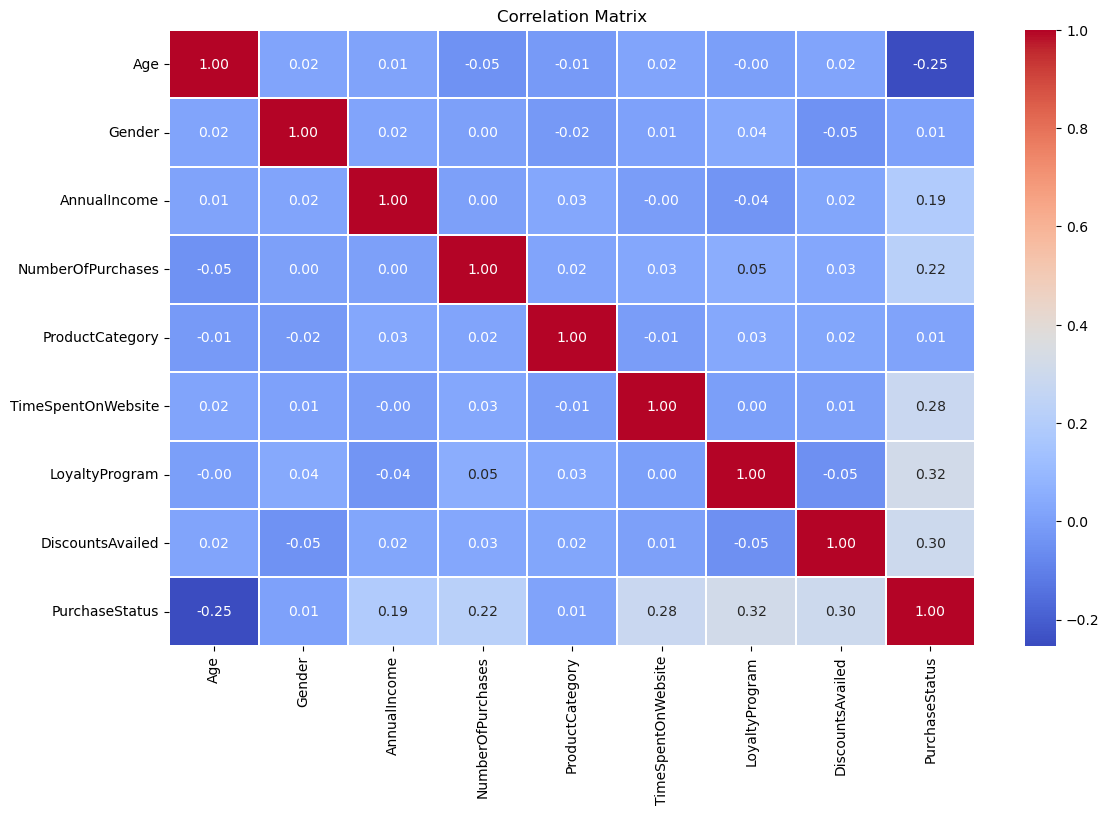

In [10]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm', linewidth= 0.2, fmt= "0.2f")
plt.title('Correlation Matrix')
plt.show()

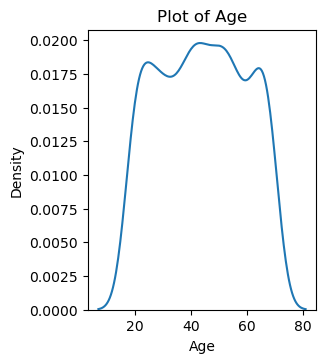

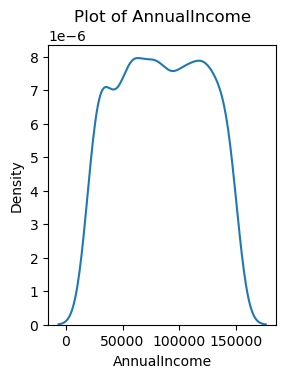

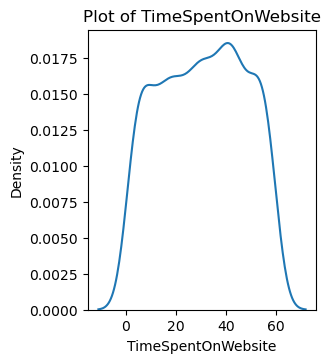

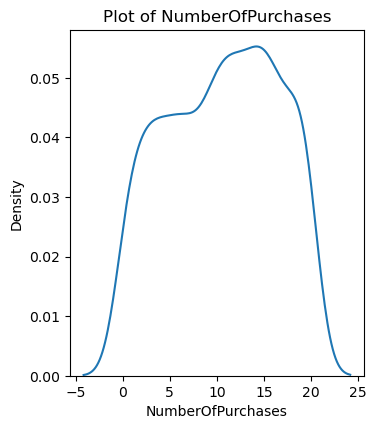

In [11]:
cols= ['Age','AnnualIncome','TimeSpentOnWebsite','NumberOfPurchases']
length= len(cols)
row= (length+2)//3

for i, variable in enumerate(cols):
    plt.figure(figsize=(10,8))
    plt.subplot(row,3,i+1)
    plt.title(f'Plot of {variable}')
    sns.kdeplot(df[variable])
    
plt.tight_layout()
plt.show()    

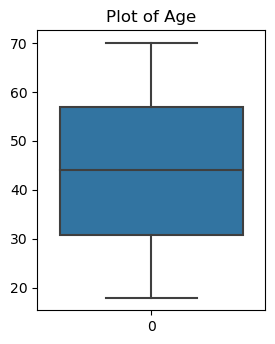

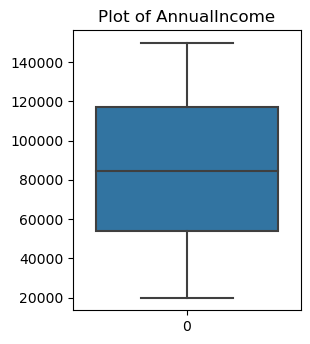

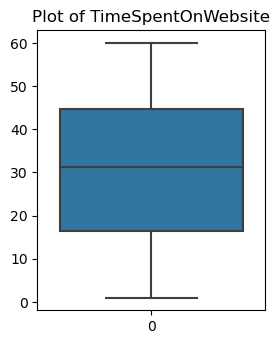

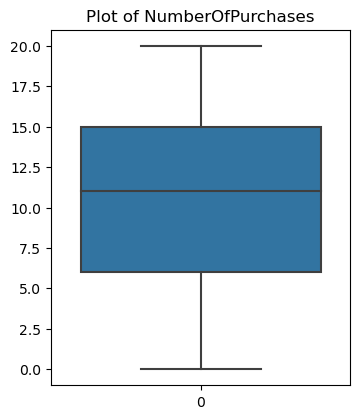

In [12]:
cols= ['Age','AnnualIncome','TimeSpentOnWebsite','NumberOfPurchases']
length= len(cols)
row= (length+2)//3

for i, variable in enumerate(cols):
    plt.figure(figsize=(10,8))
    plt.subplot(row,3,i+1)
    plt.title(f'Plot of {variable}')
    sns.boxplot(df[variable])
    
plt.tight_layout()
plt.show()    

#### 'Age' , 'AnnualIncome' , 'TimeSpentOnWebsite' and 'NumberOfPurchases' columns do not have outliers and they are somewhere normally distributed.

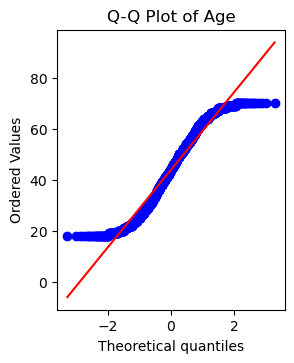

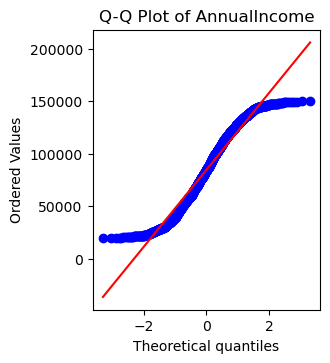

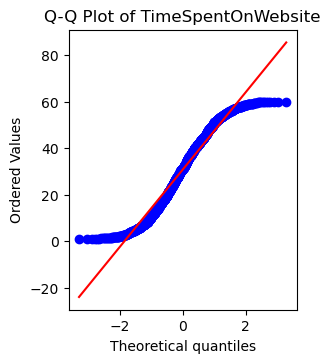

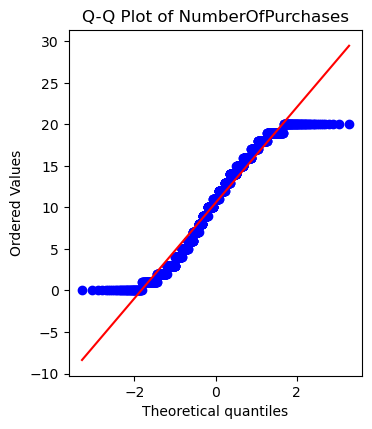

In [13]:
import scipy.stats as stats

for j,var in enumerate(cols):
    plt.figure(figsize=(10,8))
    plt.subplot(row,3,j+1)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    
plt.tight_layout()   
plt.show()

In [14]:
df['PurchaseStatus'].value_counts()

PurchaseStatus
0    740
1    648
Name: count, dtype: int64

#### Input and output

In [15]:
X=df.drop(columns=['PurchaseStatus'])
y=df['PurchaseStatus']

#### Train test split

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [17]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)

X_train Shape:  (1110, 8)
X_test Shape:  (278, 8)


In [18]:
scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

#### ANN

In [19]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [20]:
model= Sequential()

model.add(Dense(64,activation='relu',input_dim=8))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [21]:
# model.add(Dense(64,activation='relu',input_dim=8,kernel_regularizer= tensorflow.keras.regularizers.l2(0.02)))
# model.add(Dense(64,activation='relu',kernel_regularizer= tensorflow.keras.regularizers.l2(0.02)))
# model.add(Dense(64,activation='relu',kernel_regularizer= tensorflow.keras.regularizers.l2(0.02)))
# model.add(Dense(64,activation='relu',kernel_regularizer= tensorflow.keras.regularizers.l2(0.02)))
# model.add(Dense(64,activation='relu',kernel_regularizer= tensorflow.keras.regularizers.l2(0.02)))
# model.add(Dense(64,activation='relu',kernel_regularizer= tensorflow.keras.regularizers.l2(0.03)))
# model.add(Dense(64,activation='relu',kernel_regularizer= tensorflow.keras.regularizers.l2(0.03)))
# model.add(Dense(64,activation='relu',kernel_regularizer= tensorflow.keras.regularizers.l2(0.03)))
# model.add(Dense(64,activation='relu',kernel_regularizer= tensorflow.keras.regularizers.l2(0.03)))
# # model.add(Dropout(0.3))
# model.add(Dense(1,activation='sigmoid'))

In [22]:
# model.add(Dense(64,activation='relu',input_dim=8))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,activation='relu'))
# # model.add(Dropout(0.4))
# model.add(Dense(1,activation='sigmoid'))

In [23]:
adam= Adam(learning_rate=0.001)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,921 (132.50 KB)

 Trainable params: 33,921 (132.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])

In [25]:
old_weights= model.get_weights()[0]
callback= EarlyStopping(
    monitor= "val_loss",
    min_delta= 0.0001,
    patience= 20,
    verbose= 1,
    mode= "auto",
    baseline=None,
    restore_best_weights= True)

In [26]:
history= model.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test), batch_size=1, callbacks= callback)

Epoch 1/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5981 - loss: 0.6840 - val_accuracy: 0.7806 - val_loss: 0.4920
Epoch 2/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7452 - loss: 0.6044 - val_accuracy: 0.7986 - val_loss: 0.4261
Epoch 3/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7665 - loss: 0.5232 - val_accuracy: 0.8489 - val_loss: 0.3871
Epoch 4/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8088 - loss: 0.5554 - val_accuracy: 0.8309 - val_loss: 0.4877
Epoch 5/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8412 - loss: 0.4665 - val_accuracy: 0.8525 - val_loss: 0.4411
Epoch 6/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8459 - loss: 0.4414 - val_accuracy: 0.8165 - val_loss: 0.3973
Epoch 7/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8127 - loss: 0.4687 - val_accuracy: 0.8561 - val_loss: 0.3953
Epoch 8/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8526 - loss: 0

1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8640 - loss: 0.3815 - val_accuracy: 0.8561 - val_loss: 0.4071
Epoch 51/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8730 - loss: 0.4248 - val_accuracy: 0.8345 - val_loss: 0.3965
Epoch 52/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8546 - loss: 0.4053 - val_accuracy: 0.8237 - val_loss: 0.4248
Epoch 53/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8700 - loss: 0.3835 - val_accuracy: 0.8058 - val_loss: 0.4384
Epoch 54/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8641 - loss: 0.3776 - val_accuracy: 0.8309 - val_loss: 0.4285
Epoch 55/100
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8439 - loss: 0.4324 - val_accuracy: 0.8309 - val_loss: 0.4264
Epoch 55: early stopping
Restoring model weights from the end of the best epoch: 35.


In [27]:
y_pred_probab= model.predict(X_test_scaled)
y_pred_final= np.where(y_pred_probab>0.5,1,0)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [28]:
accuracy_score(y_test,y_pred_final)

0.8597122302158273

In [29]:
new_weights= model.get_weights()[0]

In [30]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [31]:
abs(100*(old_weights-new_weights)/old_weights)

array([[9.82949677e+01, 6.45598269e+00, 1.47595032e+02, 1.11143654e+02,
        1.34462891e+01, 1.96189197e+03, 4.62203156e+02, 2.82613945e+00,
        1.79989502e+02, 1.56150604e+02, 1.81158066e+01, 1.27795117e+03,
        6.60176926e+01, 6.18104362e+01, 2.30515690e+01, 9.48715881e+02,
        2.98109985e+02, 9.70659103e+01, 7.33757248e+01, 2.18636875e+01,
        2.01365906e+02, 4.18470215e+02, 1.03202583e+02, 1.27652130e+02,
        7.72997093e+00, 1.06410088e+02, 1.53778076e+01, 6.48280764e+00,
        4.04951782e+01, 1.68181854e+02, 1.77374077e+01, 3.48796478e+02,
        7.76538315e+01, 5.21952881e+02, 9.42646503e+00, 6.48617325e+01,
        2.40809631e+00, 2.52082047e+02, 2.45354519e+01, 1.39331711e+02,
        3.63509445e+01, 3.06820312e+02, 1.49150742e+02, 1.95298843e+02,
        1.11996483e+02, 2.86883057e+02, 2.88326538e+02, 4.90947113e+01,
        1.27129105e+02, 1.14119469e+02, 5.02366455e+02, 4.54898720e+01,
        5.21478920e+01, 5.25471725e+01, 9.61598740e+01, 1.356638

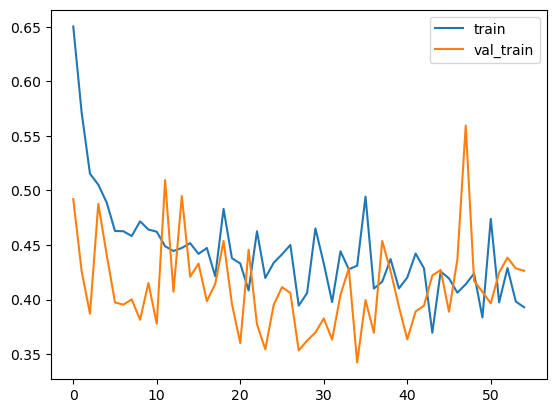

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_train')
plt.legend()
plt.show()

#### Conclusions:

#### 1. Getting the accuracy of 85.97% with learning rate= 0.001 and nodes=64
#### Now, Getting the accuracy of 84.89% with learning rate= 0.001 and nodes=128 in each hidden layer.

#### 2. Getting the accuracy of 53.60%(Stuck at this) using learning rate=0.01
#### 3. For improving the accuracy, dropout layers are added. So, with p=0.5 and learning rate= 0.001, the accuracy is 81%. But with learning rate= 0.01, they have decreased the accuracy(val_accuracy stuck at 53.60%).
#### Now, with p=0.3 and learning rate= 0.001, the accuracy is around 86%
#### Now, with p=0.2 and learning rate= 0.001, the accuracy is around 85.6%


#### 4. Again for improving the accuracy, kernel regularizer L2 is used. But it has also decreased the accuracy(val_accuracy stuck at 53.60%) with both 0.01 and 0.001 learning rates.
#### 5. Only in last layer, dropout layer is added and learning rate is 0.001, which gives around 85% accuracy.

